# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset: https://www.kaggle.com/datasets/madhab/jobposts 

Import the necessary libraries and create your dataframe(s).

In [115]:
# Importing all the necessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating a dataframe from the  CSV (similar to check point 2)

df = pd.read_csv(r"C:\Users\User\group-challenge\projects\eda-checkpoint\Online Job Posting Dataset.csv")


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [116]:
# Checking the percentage of missing data on each column
missing_counts = df.isna().sum()
missing_pct = (missing_counts / len(df)) * 100
print("Missing data in %")
print(round(missing_pct))

Missing data in %
jobpost              0.0
date                 0.0
Title                0.0
Company              0.0
AnnouncementCode    94.0
Term                60.0
Eligibility         74.0
Audience            97.0
StartDate           49.0
Duration            43.0
Location             0.0
JobDescription      20.0
JobRequirment       13.0
RequiredQual         3.0
Salary              49.0
ApplicationP         0.0
OpeningDate          4.0
Deadline             0.0
Notes               88.0
AboutC              34.0
Attach              92.0
Year                 0.0
Month                0.0
IT                   0.0
dtype: float64


In [117]:
# I have decided to drop the below 5 columns with more than 60% of the missing data.
# 1. AnnouncementCode -- some internal code with 94% data missing
# 2. Audience -- who can apply? with 97% data missing
# 3. Attach - Attachments with 92% data missing
# 4. Notes - Additional Notes with 88 % data missing
# 5. Eligibility -- Eligibility of the candidates with 74% data missing

df.drop(columns=["AnnouncementCode", "Eligibility", "Audience", "Notes", "Attach"], inplace= True )

In [118]:
df.shape  # checking if the columns are droppped 

(19001, 19)

In [119]:
# For now I've replaced all the missing data with unknown, 
# I will replace the unknown values for columns required for analysis later in the code with mean/mode depending on the requirement.

df.fillna("unknown", inplace= True)

# Checking the missing number

missing_counts = df.isna().sum()
missing_pct = (missing_counts / len(df)) * 100
print("Missing data in %")
print(round(missing_pct))

Missing data in %
jobpost           0.0
date              0.0
Title             0.0
Company           0.0
Term              0.0
StartDate         0.0
Duration          0.0
Location          0.0
JobDescription    0.0
JobRequirment     0.0
RequiredQual      0.0
Salary            0.0
ApplicationP      0.0
OpeningDate       0.0
Deadline          0.0
AboutC            0.0
Year              0.0
Month             0.0
IT                0.0
dtype: float64


## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

<Axes: ylabel='Frequency'>

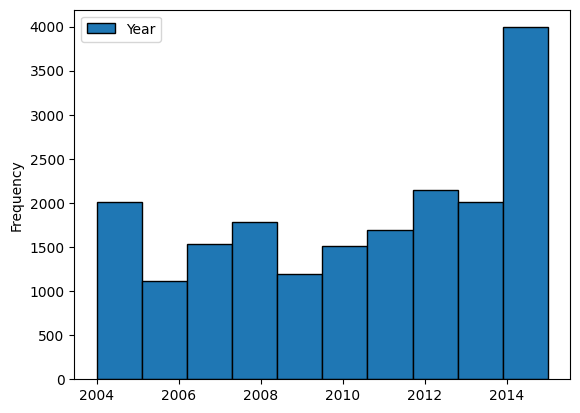

In [120]:
# As outliners are primarly apply to numerical data. Descriptive fields do not have meaningful outliners.
# Outliner test is performed on Year and Month columns of the dataset. 

df.plot.hist(column = "Year", edgecolor = "black")



<Axes: ylabel='Frequency'>

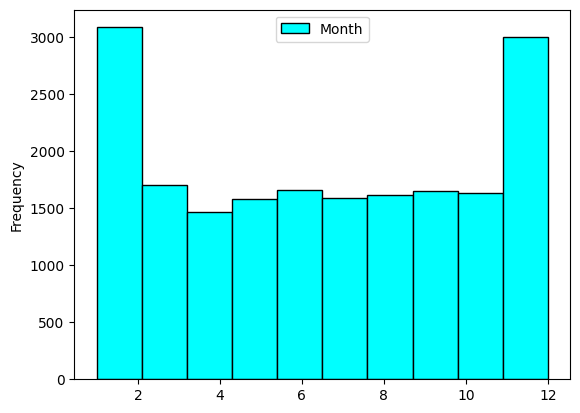

In [121]:

df.plot.hist(column = "Month", color = "cyan", edgecolor = "black")  

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [122]:
# Yes, there is some unnecessary data with no analytical values to the business issue I'm working on. 
# For our analysis we need data regarding 
# 1. Job market trends over time (In years)
# 2. What roles and industries are in high-demand 
# 3. Highly sought out skills in the market for this time period. 

# To improve clarity and focus for the analysis, the following columns have been dropped from the dataset.

# jobpost -- the data from this column is already extracted to various columns like: Title, Company, JobDecription etc.
# date -- data from this column is extracted and separated in to columns Year and Month
# Salary -- Not required for our analysis and almost 50% of the data is missing and non numerical.
# ApplicationP -- no analytical value
# OpeningDate --no analytical value
# Deadline -- no analytical value


df.drop(columns = ["jobpost", "date", "Salary", "ApplicationP", "OpeningDate", "Deadline"], inplace = True)

In [123]:
df.columns

Index(['Title', 'Company', 'Term', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'AboutC', 'Year',
       'Month', 'IT'],
      dtype='object')

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [124]:
# I'm going to check the inconsistency in the columns one by one for for my analysis.
# For job market trends over time (In years),I need columns Year and Month

# Checking inconsistency in Year

df["Year"].value_counts().sort_index()

# Result: No inconsistency in Year


df["Month"].value_counts().sort_index()

# Result: No inconsistency in Month


Month
1     1424
2     1665
3     1702
4     1466
5     1580
6     1662
7     1595
8     1613
9     1652
10    1637
11    1573
12    1432
Name: count, dtype: int64

In [125]:
#  For roles and industries(Companies) that are in high-demand, I need Title and Company.

# Title is mapped as a role for the analysis. 

df["Title"].value_counts().head(10)

df["Title"] = (
    df["Title"]
    .str.lower()    # changing all the case to lower 
    .str.strip()    # removing the whitespaces
)

# df.loc[
#     df["Title"].str.contains("software", na=False),
#     "Title"] = "software developer"

# df.loc[
#     df["Title"].str.contains("english language", na=False),
#     "Title"] = "english language expert"

# df.loc[
#     df["Title"].str.contains("accountant", na=False),
#     "Title"] = "accountant"

# df.loc[
#     df["Title"].str.contains("web", na=False),
#     "Title"] = "web developer"

# df.loc[
#     df["Title"].str.contains("java", na=False),
#     "Title"] = "java developer"

# df.loc[
#     df["Title"].str.contains("lawyer", na=False),
#     "Title"] = "lawyer"

# df.loc[
#     df["Title"].str.contains("project manager", na=False),
#     "Title"] = "project manager"

# df.loc[
#     df["Title"].str.contains("medical representative", na=False),
#     "Title"] = "medical representative"

# df.loc[
#     df["Title"].str.contains("administrative assistant", na=False),
#     "Title"] = "administrative assistant"

# df.loc[
#     df["Title"].str.contains("sales manager", na=False),
#     "Title"] = "sales manager"

#  I tried writing the above code inorder to keep the code DRY

title_dict = {
    "software": "software developer",
    "english language": "english language expert",
    "accountant": "accountant",
    "web": "web developer",
    "java": "java developer",
    "lawyer": "lawyer",
    "project manager": "project manager",
    "medical representative": "medical representative",
    "administrative assistant": "administrative assistant",
    "sales manager": "sales manager"
}

for key, title in title_dict.items():
    df.loc[df["Title"].str.contains(key, na=False), "Title"] = title

df["Title"].value_counts().head(10) # checking the top ten roles after cleaning the data with the various variation.

# After standarizing the data for the various variation in the title the count for the titles are significantly. For example software developer was initially ranked at 4th place but after cleaning, it became the  top title in the data set.
# I have not considered the Senior/Junior/Assistant in the titles as separate roles , but rather grouped all those titles as one to better analyse the demaond for these roles.


Title
software developer          1101
accountant                   787
web developer                439
administrative assistant     331
sales manager                292
medical representative       281
java developer               262
lawyer                       232
english language expert      202
project manager              197
Name: count, dtype: int64

In [126]:
# converting the rest of the titles as other if not in the top 10 titles/roles in the dataset.

title_list = ["software developer", "accountant", "web developer", "administrative assistant", "sales manager", "medical representative", "java developer", "lawyer",
               "english language expert", "project manager" ]

df.loc[~df["Title"].isin(title_list), "Title"] = "others"  


In [127]:
# Similarly, standarizing the data for the Column "Company" for top employer during the time period. 

df["Company"] = (
    df["Company"]
    .str.strip()     # removing the whitespaces
    .str.lower()    # changing all the case to lower 
    .str.replace('"', '', regex=False)  # removing double quotes from the data
)

df.loc[
    df["Title"].str.contains("career center", na=False),
    "Title"] = "career center"



df["Company"].value_counts().head(10)

Company
armentel cjsc                                356
ameriabank cjsc                              252
world vision armenia                         239
mentor graphics development services cjsc    236
career center ngo                            229
orange armenia                               203
sas group llc                                172
converse bank cjsc                           162
inecobank cjsc                               152
undp armenia office                          132
Name: count, dtype: int64

In [128]:
# To analyse the highly sought out skills in the market for this time period, we need to standarized the 'RequiredQual' column.

df["RequiredQual"].value_counts()

# Removing \r\n\t- and white spaces, standarzing the column "RequiredQual" f

df["RequiredQual"] = (
    df["RequiredQual"]
    .str.strip()     # removing the whitespaces
    .str.lower()    # changing all the case to lower 
    .str.replace('"', '', regex=False)  # removing double quotes from the data
    .str.replace(r'[\r\n\t]', ' ', regex=True) # removing carriage return and new line tab from the data
    .str.replace('-', '', regex=False) # removing "-" from the dataset

)

df["RequiredQual"]

0        to perform this job successfully, an  individu...
1         bachelor's degree; master's is preferred;   e...
2         degree in environmentally related field, or 5...
3         advanced degree in public health, social scie...
4         university degree; economical background is a...
                               ...                        
18996     at least 5 years of experience in interface/ ...
18997     university degree, ideally business related; ...
18998     degree in business, marketing or a related fi...
18999     at least 1 year of experience in online sales...
19000     higher legal education; master's degree is a ...
Name: RequiredQual, Length: 19001, dtype: object

In [129]:
#  generated a skill list based on the top 10 roles.

skills_list = ["python", "java", "c++", "javascript", "php", "core java","html", "css", "web", "apis", "rest services","data structures", "sql", "nosql", "databases",
                "git", "github","software development lifecycle", "testing", "agile", "scrum", "waterfall","financial reporting", "gaap", "ledger", "tax", "bookkeeping", 
                "budgeting", "risk management","quickbooks", "sap", "oracle","legal research", "contract drafting", "litigation procedures", "case management systems"]

# creating a new column with the matched skills for each row.

df["Matched_Skills"] = df["RequiredQual"].apply(       
    lambda text: [skill for skill in skills_list if skill in text])   # apply() runs the function row by row


In [130]:
# Replacing the inconsistent values in column "Term" and creating  a new column as clean_term. Not need for analysis but including in standarizing the dataset.

df["Term_clean"] = (
    df["Term"]
    .str.lower()
    .str.strip()
)

def clean_term(x):
    if pd.isna(x):
        return "unknown"
    if "full" in x:
        return "full time"
    if "part" in x:
        return "part time"
    if "long" in x:
        return "long term"
    return "other"

df["Term_clean"] = df["Term_clean"].apply(clean_term)

df["Term_clean"].value_counts()

Term_clean
other        11638
full time     6937
part time      253
long term      173
Name: count, dtype: int64

In [131]:
df.insert(0, "PostNumber", range(1, len(df) + 1)) # adding a column as post serial number for grouping the data in further analysis. I could have kept the Jobpost column for this but the data in that column was too large and of no analytical value.

In [132]:
df.head()

,PostNumber,Title,Company,Term,StartDate,Duration,Location,JobDescription,JobRequirment,RequiredQual,AboutC,Year,Month,IT,Matched_Skills,Term_clean
0,1,others,ameria investment consulting company,unknown,unknown,unknown,"Yerevan, Armenia",AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"to perform this job successfully, an individu...",unknown,2004,1,False,"[budgeting, risk management]",other
1,2,others,international research & exchanges board (irex),unknown,unknown,3 months,"IREX Armenia Main Office; Yerevan, Armenia \r\...",unknown,unknown,bachelor's degree; master's is preferred; e...,The International Research & Exchanges Board (...,2004,1,False,[],other
2,3,others,caucasus environmental ngo network (cenn),unknown,unknown,Renewable annual contract\r\nPOSITION,"Yerevan, Armenia",Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"degree in environmentally related field, or 5...",The Caucasus Environmental NGO Network is a\r\...,2004,1,False,[],other
3,4,others,manoff group,unknown,unknown,unknown,"Manila, Philippines",The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"advanced degree in public health, social scie...",unknown,2004,1,False,[],other
4,5,software developer,yerevan brandy company,unknown,unknown,unknown,"Yerevan, Armenia",unknown,- Rendering technical assistance to Database M...,university degree; economical background is a...,unknown,2004,1,True,[sql],other


In [133]:
df.to_csv("output.csv", index=False)

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
   No, irregular data is not present in the dataset. There are no outliners as most of the data is descriptive. Only Year and Month is the numerical data and there are no ouliners found in those columns.

2. Did the process of cleaning your data give you new insights into your dataset?
    Yes, the dataset is huge with repeatative data in some of the columns. Making those columns redunant.
    Most of the data is in big string forms which made standarzing data difficult. A
    

3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations? I was able to make the standarized the required skill set column, for further analysis I need to calculate the frequency of each skills from the new column.
